<h2>This code has two section:
   KNN(Without Pipeline) &
   KNN(With Oops n Pipline)</h2>

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KClassifier

In [30]:
df= pd.read_csv("Breast_Cancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [31]:
df.drop(columns=['id','Unnamed: 32'],inplace= True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
df.shape

(569, 31)

In [49]:
x_train, x_test, y_train, y_test= train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size=0.2, random_state=2)

In [34]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [50]:
x_train.shape

(455, 30)

In [51]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
y_pred=knn.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9912280701754386

In [59]:
score=[]
for i in range(1,16):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test, y_pred))

In [60]:
score

[0.956140350877193,
 0.9736842105263158,
 0.9912280701754386,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544]

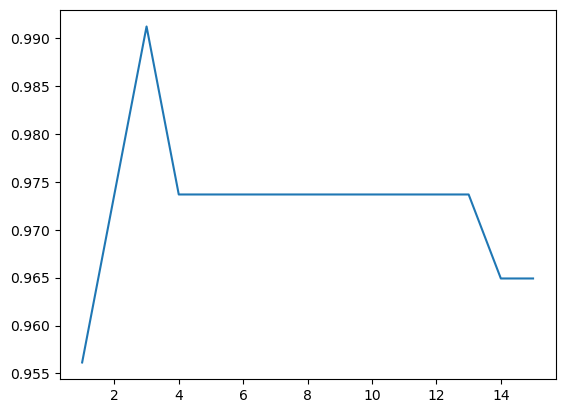

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),score)


Model Accuracy: 0.9737

Enter values for the following 4 major medical features:



radius_mean:  22.33
texture_mean:  23
perimeter_mean:  12
area_mean:  45


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction: BENIGN (Non-cancerous)


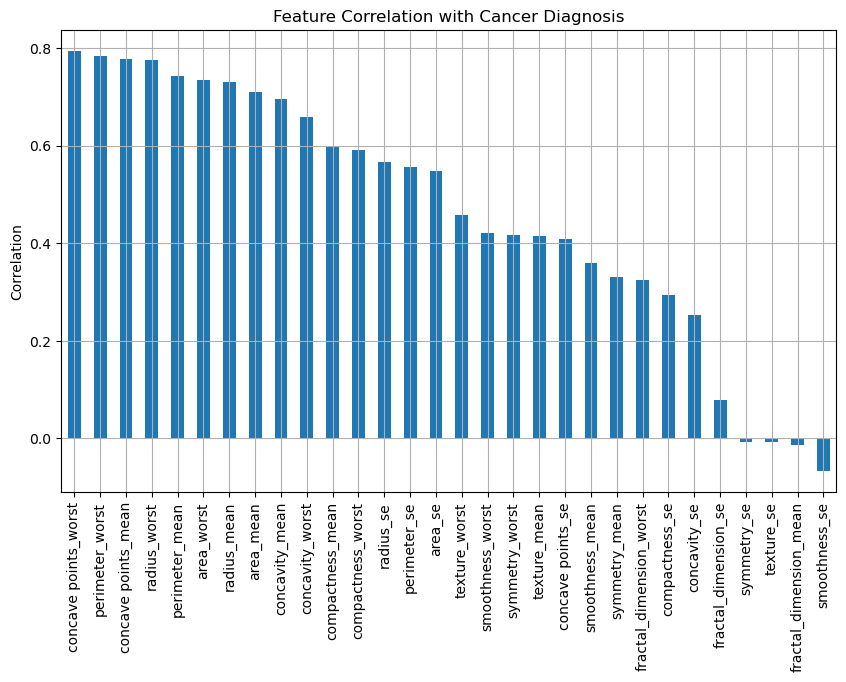

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

class DataLoader:
    def __init__(self, path):
        self.path = path
        self.feature_names = None
        self.feature_means = None

    def load_and_split(self):
        df = pd.read_csv(self.path)
        df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

        self.feature_names = df.columns[1:]
        self.feature_means = df.iloc[:, 1:].mean()

        X = df.iloc[:, 1:]
        y = df.iloc[:, 0]

        return train_test_split(X, y, test_size=0.2, random_state=2)

class ModelPipeline:
    def __init__(self, k):
        self.k = k

    def build(self):
        return Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=self.k))
        ])

class Trainer:
    def __init__(self, model):
        self.model = model

    def train(self, x_train, y_train):
        self.model.fit(x_train, y_train)
        return self.model


class Evaluator:
    def __init__(self, model):
        self.model = model

    def evaluate(self, x_test, y_test):
        y_pred = self.model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        return acc

class UserInputPredictor:
    def __init__(self, model, feature_names, feature_means):
        self.model = model
        self.feature_names = feature_names
        self.feature_means = feature_means

        self.major_features = [
            'radius_mean',
            'texture_mean',
            'perimeter_mean',
            'area_mean'
        ]

    def get_user_input(self):
        print("\nEnter values for the following 4 major medical features:\n")
        user_values = {}

        for feature in self.major_features:
            while True:
                try:
                    val = float(input(f"{feature}: "))
                    if val < 0:
                        raise ValueError
                    user_values[feature] = val
                    break
                except:
                    print("Invalid input. Enter a positive number.")

        # Fill remaining features with mean values
        full_input = []
        for feature in self.feature_names:
            if feature in user_values:
                full_input.append(user_values[feature])
            else:
                full_input.append(self.feature_means[feature])

        return np.array(full_input).reshape(1, -1)

    def predict(self):
        user_data = self.get_user_input()
        prediction = self.model.predict(user_data)[0]

        if prediction == 'M':
            print("\nPrediction: MALIGNANT (Cancerous)")
        else:
            print("\nPrediction: BENIGN (Non-cancerous)")

class FeatureAnalyzer:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
        self.df.iloc[:, 0] = self.df.iloc[:, 0].map({'M': 1, 'B': 0})

    def correlation_analysis(self):
        corr = self.df.corr()
        target_corr = corr.iloc[0, 1:].sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        target_corr.plot(kind='bar')
        plt.title("Feature Correlation with Cancer Diagnosis")
        plt.ylabel("Correlation")
        plt.grid(True)
        plt.show()

class KNNExperiment:
    def __init__(self, data_path):
        self.data_loader = DataLoader(data_path)

    def run(self, k=5):
        x_train, x_test, y_train, y_test = self.data_loader.load_and_split()

        model = ModelPipeline(k).build()
        trained_model = Trainer(model).train(x_train, y_train)

        acc = Evaluator(trained_model).evaluate(x_test, y_test)
        print(f"\nModel Accuracy: {acc:.4f}")

        predictor = UserInputPredictor(
            trained_model,
            self.data_loader.feature_names,
            self.data_loader.feature_means
        )
        predictor.predict()

        analyzer = FeatureAnalyzer(self.data_loader.path)
        analyzer.correlation_analysis()

if __name__ == "__main__":
    experiment = KNNExperiment("Breast_Cancer.csv")
    experiment.run(k=5)
